In [6]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [7]:
import pandas as pd #library dataframe
import numpy as np #library operasi dan perhitungan angka (matematika)
import matplotlib.pyplot as plt #library pembuatan grafik

In [4]:
#mendapatkan data publik
!python -m wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


Saved under moore.csv


In [16]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1) #Membuat 2 dimensi
Y = data[:,-1]

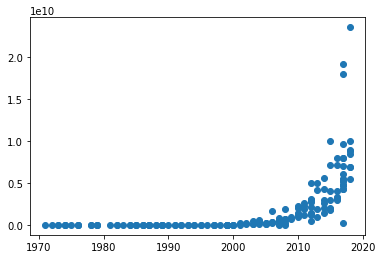

In [18]:
#plot data X dan Y
plt.scatter(X,Y)

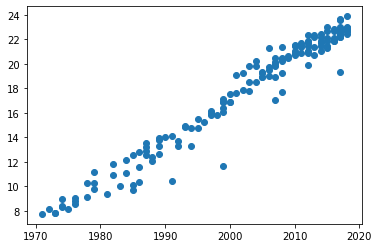

In [19]:
#Karena ingin model linear, maka gunakan log
Y = np.log(Y)
plt.scatter(X,Y)

In [20]:
#skalakan nilai X agar tidak terlalu besar, namun nanti kita harus mengubahnya lagi
X = X - X.mean()

In [24]:
#Mari kita buat model tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

#Bisa juga pakai optimizer adam kalau mau 
#model.compile(optimizer='adam', loss='mse')

#learning rate scheduler
def schedule(epoch, lr):
    if epoch>= 50:
        return 0.0001 # Jika epoch lebih dari 50 maka lr diperkecil agar lebih presisi
    return 0.001 # lr standar (dibawah 50) segini agar tidak terlalu lama

#menerapkan fungsi diatas
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Training model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 3s 9ms/step - loss: 354.8260
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 315.2900
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 244.1251
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 237.2934
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 164.0597
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 144.5313
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 103.0625
Epoch 8/200
6/6 [==============================] - 0s 9ms/step - loss: 72.1675
Epoch 9/200
6/6 [==============================] - 0s 9ms/step - loss: 55.9485
Epoch 10/200
6/6 [==============================] - 0s 9ms/step - loss: 45.5345
Epoch 11/200
6/6 [==============================] - 0s 9ms/step - loss: 51.5701
Epoch 12/200
6/6 [==============================] - 0s 9ms/step - loss: 63.7137
Epoch 13/200
6/6 [=======================

6/6 [==============================] - 0s 9ms/step - loss: 0.8734
Epoch 103/200
6/6 [==============================] - 0s 10ms/step - loss: 0.8742
Epoch 104/200
6/6 [==============================] - 0s 10ms/step - loss: 0.8705
Epoch 105/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8753
Epoch 106/200
6/6 [==============================] - 0s 10ms/step - loss: 0.8724
Epoch 107/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8733
Epoch 108/200
6/6 [==============================] - 0s 10ms/step - loss: 0.8763
Epoch 109/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8784
Epoch 110/200
6/6 [==============================] - 0s 8ms/step - loss: 0.8849
Epoch 111/200
6/6 [==============================] - 0s 8ms/step - loss: 0.8746
Epoch 112/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8728
Epoch 113/200
6/6 [==============================] - 0s 12ms/step - loss: 0.9057
Epoch 114/200
6/6 [==============================

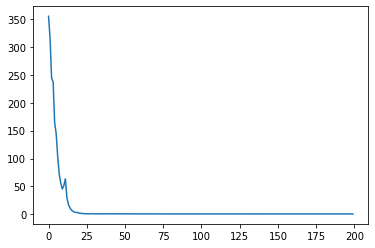

In [26]:
#plot hasil loss
plt.plot(r.history['loss'], label='loss')

In [27]:
# W is vector
# b is scalar
#W.shape = (D, M)
#b.shape = (M,)

#D = input size
#M = output size

#mendapatkan garis slope
#
print(model.layers)
print(model.layers[0].get_weights)

<bound method Layer.get_weights of <tensorflow.python.keras.layers.core.Dense object at 0x00000213C1039280>>


In [28]:
# garis slope
a = model.layers[0].get_weights()[0][0,0]

In [29]:
print("time to double :", np.log(2) / a)

time to double : 2.0207500300478203


In [30]:
# if you know theanalytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum()) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) )/ denominator
print(a,b)
print("Time to double :", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double : 2.0286295205239204
